# G35. Módulo II. Técnicas Estadísticas

### Beatriz Yunuen González Rodríguez

 ## 3. Estadística Inferencial

> Estimadores y sus propiedades

> Intervalos de confianza

>Pruebas de hipótesis 

### Estimadores y sus propiedades

La estadística inferencial se ocupa de predecir y sacar conclusiones para una población tomando como base una muestra de dicha población.
Como todas las predicciones, siempre han de hacerse bajo un cierto grado de fiabilidad o confianza.

En un sentido amplio, la inferencia es la parte de la estadística que estudia grandes poblaciones a partir de una pequeña parte de estas.

Existen diversos problemas de inferencia estadística según el tipo de conclusiones que se quieran establecer sobre la situación aleatoria.

$\textbf{Estimación puntual.}$
Se pretende obtener un pronóstico numérico único acerca de un determinado parámetro de la distribución. 
          
$\textbf{Estimación por intervalos.}$
El objetivo es proporcionar un margen de variación para un determinado parámetro de la distribución.
          
$\textbf{Contrastes de hipótesis.}$
Se trata de corroborar o invalidar una determinada afirmación acerca de la distribución.

Dependiendo del grado de conocimiento de esta distribución, se distinguen dos métodos para realizar procesos de inferencia.

$\textbf{Inferencia paramétrica.}$
Se admite que la distribución de la población pertenece a una cierta familia paramétrica de distribuciones, siendo necesario únicamente precisar el valor de los parámetros para determinar la distribución poblacional.

### Propiedades de los estimadores

#### Insesgadez
Un estimador $ \hat{\theta} $ es insesgado si su esperanza matemática coincide con el parámetro poblacional:

$$E[\hat{\theta}] = \theta$$

#### Consistencia
Un estimador es consistente si converge en probabilidad al parámetro verdadero cuando $ n \to \infty $:

$$\lim_{n \to \infty} P(|\hat{\theta} - \theta| > \epsilon) = 0 \quad \forall \epsilon > 0$$

#### Eficiencia
Dos estimadores insesgados $ \hat{\theta}_1 $ y $ \hat{\theta}_2 $ se comparan mediante su varianza. El más eficiente es el de menor varianza:

$$\text{Var}(\hat{\theta}_1) < \text{Var}(\hat{\theta}_2) \implies \hat{\theta}_1 \text{ es más eficiente.}$$

#### Suficiencia
Un estimador es suficiente si contiene toda la información relevante sobre $ \theta $ presente en la muestra.

*Criterio de factorización de Fisher-Neyman:*

$$f(X_1, \dots, X_n \mid \theta) = g(\hat{\theta} \mid \theta) \cdot h(X_1, \dots, X_n)$$

donde $ h $ no depende de $ \theta $.

### Intervalos de Confianza

Un intervalo de confianza al $ (1-\alpha) \times 100\% $ para un parámetro $ \theta $ es un rango $ (L, U) $ tal que:

$$P(L \leq \theta \leq U) = 1 - \alpha$$

#### Fórmula del Intervalo de Confianza:
$$
IC = \bar{X} \pm t_{\alpha/2, n-1} \cdot \frac{S}{\sqrt{n}}
$$

Donde:
- $ \bar{X} $: Media muestral.
- $ t_{\alpha/2, n-1} $: Valor crítico de la distribución t de Student con $ n-1 $ grados de libertad.
- $ S $: Desviación estándar muestral.
- $ n $: Tamaño de la muestra.

**Caso 1:** Varianza poblacional $ \sigma^2 $ conocida:

$$IC = \bar{X} \pm z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}$$

**Caso 2:** Varianza poblacional desconocida (usando t de Student)

Cuando la varianza poblacional $( \sigma^2 $) es desconocida, se utiliza la distribución t de Student para construir el intervalo de confianza.

IC del 95% para μ: (9.662, 10.538)


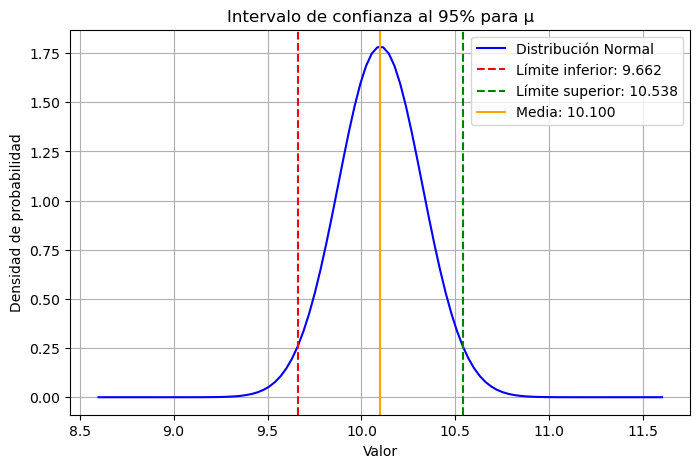

In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Datos
muestra = np.array([10.2, 9.8, 10.5, 10.1, 9.9])
sigma = 0.5  # conocido
nivel_confianza = 0.95

# Cálculo
media = np.mean(muestra)
z_critico = stats.norm.ppf(1 - (1 - nivel_confianza) / 2)
margen_error = z_critico * (sigma / np.sqrt(len(muestra)))
ic = (media - margen_error, media + margen_error)

print(f"IC del 95% para μ: ({ic[0]:.3f}, {ic[1]:.3f})")

# Graficar los resultados
x = np.linspace(media - 3*sigma, media + 3*sigma, 100)
y = stats.norm.pdf(x, loc=media, scale=sigma / np.sqrt(len(muestra)))

plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Distribución Normal", color="blue")
plt.axvline(ic[0], color="red", linestyle="--", label=f"Límite inferior: {ic[0]:.3f}")
plt.axvline(ic[1], color="green", linestyle="--", label=f"Límite superior: {ic[1]:.3f}")
plt.axvline(media, color="orange", linestyle="-", label=f"Media: {media:.3f}")
plt.title(f"Intervalo de confianza al {nivel_confianza*100:.0f}% para μ")
plt.xlabel("Valor")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid()
plt.show()

### Pruebas de hipótesis

Son procedimientos para evaluar afirmaciones sobre parámetros poblacionales.

### Pasos:
1. Establecer hipótesis nula $(H_0$) y alternativa $(H_1$).
2. Seleccionar nivel de significancia $(\alpha$).
3. Calcular estadístico de prueba.
4. Determinar región crítica o valor $p$.
5. Tomar decisión rechazar o no rechazar $(H_0$).

### Fórmulas comunes:
- Prueba $z$ para media $(\sigma)$ conocida:

  $$
  z = \frac{\bar{x} - \mu_0}{\sigma / \sqrt{n}}
  $$

- Prueba $t$ para media $(\sigma)$ desconocida:
  $$
  t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}
  $$

- Prueba $z$ para proporciones:
  $$
  z = \frac{\hat{p} - p_0}{\sqrt{p_0 (1 - p_0) / n}}
  $$

## Prueba de hipótesis para la media ($ \sigma $ desconocida)

- **Hipótesis nula ($ H_0 $):** $ \mu = \mu_0 $
- **Hipótesis alternativa $( H_1 )$:**
  - $ \mu \neq \mu_0 $ (prueba bilateral)
  - $ \mu > \mu_0 $ (prueba unilateral derecha)
  - $ \mu < \mu_0 $ (prueba unilateral izquierda)

### Estadístico de prueba
$$
t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}
$$

### Regla de decisión
- **Prueba bilateral:** Rechazar $ H_0 $ si $ |t| > t_{\alpha/2, n-1} $
- **Prueba unilateral derecha:** Rechazar $ H_0 $ si $ t > t_{\alpha, n-1} $
- **Prueba unilateral izquierda:** Rechazar $ H_0 $ si $ t < -t_{\alpha, n-1} $

### Alternativamente:
Rechazar $ H_0 $ si el valor $p$ $ < \alpha $.

Estadístico z: -2.0000
Valor crítico z_alpha: -1.6449
p-valor: 0.0228


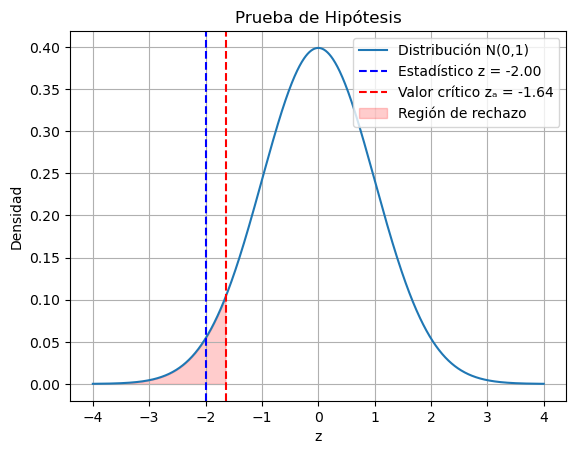

In [4]:
#-------------------------------
#           EJEMPLO
#------------------------------
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Parámetros conocidos
mu_0 = 5       # media bajo H0
sigma = 1.2    # desviación estándar poblacional
x_bar = 4.6    # media muestral
n = 36         # tamaño de muestra
alpha = 0.05   # nivel de significancia

# Estadístico de prueba z
z = (x_bar - mu_0) / (sigma / np.sqrt(n))

# Valor crítico para prueba unilateral izquierda
z_crit = norm.ppf(alpha)

# p-valor
p_value = norm.cdf(z)

# Mostrar resultados
print(f"Estadístico z: {z:.4f}")
print(f"Valor crítico z_alpha: {z_crit:.4f}")
print(f"p-valor: {p_value:.4f}")

# Visualización
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

plt.plot(x, y, label='Distribución N(0,1)')
plt.axvline(z, color='blue', linestyle='--', label=f'Estadístico z = {z:.2f}')
plt.axvline(z_crit, color='red', linestyle='--', label=f'Valor crítico zₐ = {z_crit:.2f}')
plt.fill_between(x, 0, y, where=(x <= z_crit), color='red', alpha=0.2, label='Región de rechazo')
plt.title('Prueba de Hipótesis')
plt.xlabel('z')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()